In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pprint import pprint

# 1. Get data
## 1.1 Oil price data

In [2]:
# get the historic oil price
# Define the stock ticker symbol and the date range
oil = yf.Ticker("CL=F") # a ticker object for WTI oil price

# Retrieve historical data
oil_df = oil.history(period="max") #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

# Print the last few rows of the data
print(oil_df.tail())

                                Open       High        Low      Close  Volume  \
Date                                                                            
2024-01-29 00:00:00-05:00  78.900002  79.290001  76.410004  76.779999  331925   
2024-01-30 00:00:00-05:00  77.019997  78.139999  75.849998  77.820000  347242   
2024-01-31 00:00:00-05:00  77.839996  78.110001  75.519997  75.849998  344493   
2024-02-01 00:00:00-05:00  75.959999  76.949997  73.699997  73.820000  577936   
2024-02-02 00:00:00-05:00  73.910004  74.519997  71.790001  72.410004  435788   

                           Dividends  Stock Splits  
Date                                                
2024-01-29 00:00:00-05:00        0.0           0.0  
2024-01-30 00:00:00-05:00        0.0           0.0  
2024-01-31 00:00:00-05:00        0.0           0.0  
2024-02-01 00:00:00-05:00        0.0           0.0  
2024-02-02 00:00:00-05:00        0.0           0.0  


c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


## 1.2 Stock price data

In [3]:
mur= yf.Ticker("MUR") # a ticker object
# actions = mur.actions # (dividens, splits)
dividends = mur.dividends
splits = mur.splits
print(dividends, splits)

Date
1983-05-10 00:00:00-04:00    0.053972
1983-08-09 00:00:00-04:00    0.053972
1983-11-07 00:00:00-05:00    0.053972
1984-02-08 00:00:00-05:00    0.053972
1984-05-09 00:00:00-04:00    0.053972
                               ...   
2022-11-10 00:00:00-05:00    0.250000
2023-02-10 00:00:00-05:00    0.275000
2023-05-12 00:00:00-04:00    0.275000
2023-08-11 00:00:00-04:00    0.275000
2023-11-10 00:00:00-05:00    0.275000
Name: Dividends, Length: 164, dtype: float64 Date
1980-06-10 00:00:00-04:00    3.000
2002-12-31 00:00:00-05:00    2.000
2005-06-06 00:00:00-04:00    2.000
2013-09-03 00:00:00-04:00    1.158
Name: Stock Splits, dtype: float64


c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [5]:
# get all stock info
pprint(mur.info)

# show meta information about the history (requires history() to be called first)
pprint(mur.history_metadata)

start_date = oil_df.index[0].strftime('%Y-%m-%d')
end_date = oil_df.index[-1].strftime('%Y-%m-%d')
# get historical market data
mur_df = mur.history(start=start_date, end=end_date) #period: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

{'52WeekChange': -0.068615615,
 'SandP52WeekChange': 0.19340658,
 'address1': '9805 Katy Freeway',
 'address2': 'Suite G-200',
 'ask': 39.22,
 'askSize': 1100,
 'auditRisk': 1,
 'averageDailyVolume10Day': 2619680,
 'averageVolume': 1854386,
 'averageVolume10days': 2619680,
 'beta': 2.221,
 'bid': 37.0,
 'bidSize': 800,
 'boardRisk': 4,
 'bookValue': 35.12,
 'city': 'Houston',
 'companyOfficers': [{'age': 61,
                      'exercisedValue': 5868870,
                      'fiscalYear': 2022,
                      'maxAge': 1,
                      'name': 'Mr. Roger W. Jenkins',
                      'title': 'CEO, President & Director',
                      'totalPay': 3269678,
                      'unexercisedValue': 0,
                      'yearBorn': 1962},
                     {'age': 50,
                      'exercisedValue': 259110,
                      'fiscalYear': 2022,
                      'maxAge': 1,
                      'name': 'Mr. Thomas J. Mireles',
      

c:\Users\YX\Documents\QX\Finance-Analytics\.venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [15]:
# show financials:
# - income statement
mur.income_stmt
mur.quarterly_income_stmt
# - balance sheet
mur.balance_sheet
mur.quarterly_balance_sheet
# - cash flow statement
mur.cashflow
mur.quarterly_cashflow

,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,225752000.0,120457000.0,-65543000.0,316118000.0
Repayment Of Debt,-348836000.0,-100157000.0,-100139000.0,-296417000.0
Issuance Of Debt,100000000.0,100000000.0,100000000.0,100000000.0
Capital Expenditure,-230315000.0,-349434000.0,-345319000.0,-185400000.0
Interest Paid Supplemental Data,NaN,34947000.0,19358000.0,37625000.0
Income Tax Paid Supplemental Data,NaN,7562000.0,3342000.0,8360000.0
End Cash Position,327769000.0,369355000.0,312383000.0,491963000.0
Beginning Cash Position,369355000.0,312383000.0,491963000.0,465998000.0
Effect Of Exchange Rate Changes,479000.0,-1511000.0,618000.0,1307000.0
Changes In Cash,-42065000.0,58483000.0,-180198000.0,24658000.0


Text(0.5, 1.0, 'Historical Stock Prices and Oil Prices')

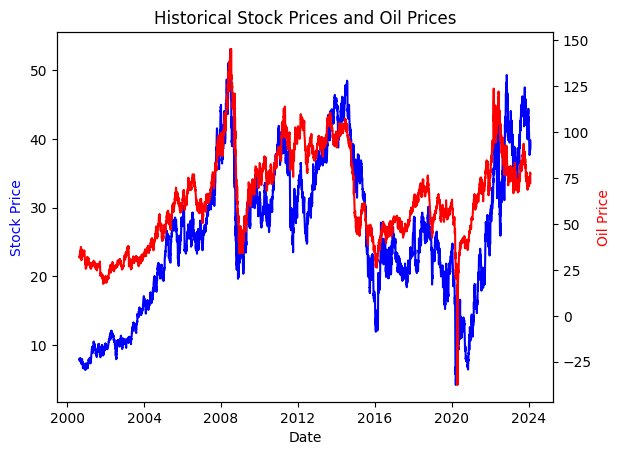

In [7]:
# plot the historical stock price and oil price
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mur_df.index, mur_df['Close'], color='b', label='Stock Price')
ax2.plot(oil_df.index, oil_df['Close'], color='r', label='Oil Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')
ax2.set_ylabel('Oil Price', color='r')
plt.title('Historical Stock Prices and Oil Prices')

253 trade days in 2020

* calculating financial indicators
* conducting statistical analysis
* building predictive models based on the retrieved historical financial data

Add columns of day of week, is_holiday in the dataframe

In [8]:
# function to create features including daily returns for the dataframe mur_df, oil_df
def create_features(df):
    df['Daily Returns'] = df['Close'].pct_change()
    df['Day of Week'] = df.index.day_name()
    df['Month'] = df.index.month
    return df

In [9]:

mur_df = create_features(mur_df)
oil_df = create_features(oil_df)
print(oil_df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Daily Returns', 'Day of Week', 'Month'],
      dtype='object')


Pearson's R: 0.26738887044753923


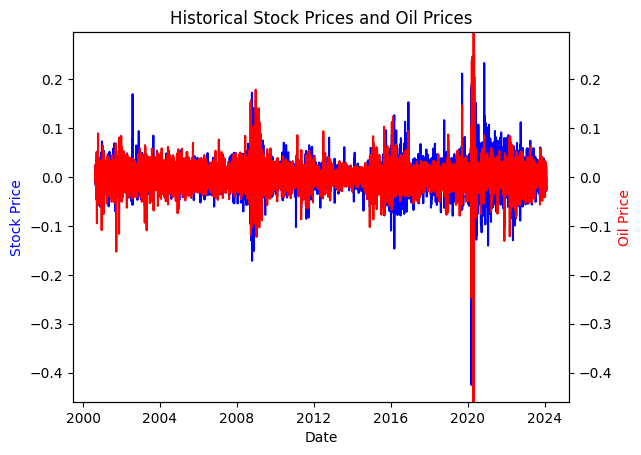

In [13]:
# plot daily returns
# plot the historical stock price and oil price
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mur_df.index, mur_df['Daily Returns'], color='b', label='Stock Price')
ax2.plot(oil_df.index, oil_df['Daily Returns'], color='r', label='Oil Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')
ax2.set_ylabel('Oil Price', color='r')
ax2.set_ylim(ax1.get_ylim())
plt.title('Historical Stock Prices and Oil Prices')

# print the Pearson's R between the two variables
print('Pearson\'s R:', mur_df['Daily Returns'].corr(oil_df['Daily Returns']))

In [14]:
# ran ad-fuller test on daily returns to test for stationarity
result = adfuller(mur_df['Daily Returns'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -14.459490030193749
p-value: 6.884913898018333e-27
Critical Values: {'1%': -3.431465268306104, '5%': -2.862032844007873, '10%': -2.5670323387080183}


ADF results is more extreme than critical value at 1%, or p-value is small, so we can reject the null hypothesis. The daily returns data is stationary.